<a href="https://colab.research.google.com/github/minu-97/TIL/blob/master/kobart_%EC%82%AC%EC%A0%84%ED%95%99%EC%8A%B5_%EC%B6%94%EA%B0%80%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# kobart-sumarization 사전학습모델 출력 문장길이 증가를 위한 전이학습(ai허브 문서요약 데이터셋 사용)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## test데이터 셋 압축해제

In [ ]:
import shutil

filename = '/content/drive/MyDrive/multi/final_project/kobart_model/data/01.news_r_train.zip'
extract_dir ='/content/drive/MyDrive/multi/final_project/kobart_model/data/test'
archive_format = "zip"

shutil.unpack_archive(filename,extract_dir, archive_format)

## valid 데이터 셋 압축해제

In [ ]:
import shutil

filename = '/content/drive/MyDrive/multi/final_project/kobart_model/data/01.news_r_val.zip'
extract_dir ='/content/drive/MyDrive/multi/final_project/kobart_model/data/test'
archive_format = "zip"

shutil.unpack_archive(filename,extract_dir, archive_format)

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.9 MB/s eta 0:00:00


In [ ]:
!pip install "transformers[sentencepiece]"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 69.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.
tensorflow-metadata 1.13.1 requires protobuf<5,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.


In [ ]:
import transformers

print(transformers.__version__)

4.29.2


In [ ]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import json

In [ ]:
file_path = "/content/drive/MyDrive/multi/final_project/sodirty/data/05.json"

with open(file_path, 'r') as file:
    data = json.load(file)
    print(type(data))
    print(data)

<class 'dict'>
{'title': "'변신 로봇' 드디어 나온다", 'slug': 'byeonsin-robos-deudieo-naonda', 'source': 'http://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=105&sid2=228&oid=277&aid=0003868609', 'length': 19, 'sentences': ['애니메이션에서나 볼 수 있었던 자동차 변신 로봇이 일본에서 실제로 만들어진다', "11일 소프트뱅크 계열 로봇 제조업체인 아스라테크(Asratec)와 산세이 테크놀로지, 브레이브 로보틱스가 3사 합작으로 변신 로봇 '제이 다이트 라이드(J-deite RIDE)'를 제작한다고 발표했다", '이 로봇은 아스라테크와 브레이브 로보틱스가 참여한 로봇 제조 계획 "프로젝트 제이 다이트\'의 일환으로 지난해 6월부터 개발이 진행되고 있다', "하드웨어 설계 ·제작은 브레이브 로보틱스가 맡고 제어용 소프트웨어 '브이시도(V-Sido)'의 개발은 아스라테크가 담당한다", '산세이 테크놀로지는 로봇의 양산화를 위해서 합류했다', "'제이 다이트 라이드'는 내년에 완성돼 테마 파크와 각종 이벤트 참여, 기업 홍보 등의 목적으로 쓰이게 된다", "이후에는 기체의 크기를 키워 2020년에는 5m에 달하는 '제이 다이트 오리지널'로 재탄생할 예정이다", "디자인은 애니메이션 '기동전사 건담', '달려라 번개호' 등 유명 애니메이션에 등장하는 로봇을 창조한 오오카와라 쿠니오가 맡았다", "오오카와라는 '제이 다이트 라이드' 외에 프로젝트에서 제작할 예정인 다른 로봇의 디자인도 맡는다", "'제이다이트 라이드'의 머리 부분 스케치", '언뜻 보기에도 건담이 연상된다', '이 로봇은 10초만에 자동차로 변신할 수 있으며 전체 길이는 약 4m이다', '로봇 모드에서는 두 다리로 걸을 수 있다', '차량 모드에서는 평범한 자동차와 마찬가지로 사람이 운전석에 앉아 조작하면 된다', "'철인28호'처럼 로

In [ ]:
print(data['sentences'])

['애니메이션에서나 볼 수 있었던 자동차 변신 로봇이 일본에서 실제로 만들어진다', "11일 소프트뱅크 계열 로봇 제조업체인 아스라테크(Asratec)와 산세이 테크놀로지, 브레이브 로보틱스가 3사 합작으로 변신 로봇 '제이 다이트 라이드(J-deite RIDE)'를 제작한다고 발표했다", '이 로봇은 아스라테크와 브레이브 로보틱스가 참여한 로봇 제조 계획 "프로젝트 제이 다이트\'의 일환으로 지난해 6월부터 개발이 진행되고 있다', "하드웨어 설계 ·제작은 브레이브 로보틱스가 맡고 제어용 소프트웨어 '브이시도(V-Sido)'의 개발은 아스라테크가 담당한다", '산세이 테크놀로지는 로봇의 양산화를 위해서 합류했다', "'제이 다이트 라이드'는 내년에 완성돼 테마 파크와 각종 이벤트 참여, 기업 홍보 등의 목적으로 쓰이게 된다", "이후에는 기체의 크기를 키워 2020년에는 5m에 달하는 '제이 다이트 오리지널'로 재탄생할 예정이다", "디자인은 애니메이션 '기동전사 건담', '달려라 번개호' 등 유명 애니메이션에 등장하는 로봇을 창조한 오오카와라 쿠니오가 맡았다", "오오카와라는 '제이 다이트 라이드' 외에 프로젝트에서 제작할 예정인 다른 로봇의 디자인도 맡는다", "'제이다이트 라이드'의 머리 부분 스케치", '언뜻 보기에도 건담이 연상된다', '이 로봇은 10초만에 자동차로 변신할 수 있으며 전체 길이는 약 4m이다', '로봇 모드에서는 두 다리로 걸을 수 있다', '차량 모드에서는 평범한 자동차와 마찬가지로 사람이 운전석에 앉아 조작하면 된다', "'철인28호'처럼 로봇과 떨어져 원격 조종을 해도 된다", '최대 2명이 탈 수 있다', '로봇이 두 다리로 걷는 속도는 시속 5km에 불과하지만 발 부분의 바퀴를 이용하면 한시간에 최고 30km를 갈 수 있다', '차로 변신했을 때 최고 속도는 시속 60km이다', "한편 '제이다이트 라이드'의 1.5m짜리 시제품은 14일(현지시간) 미국 올랜도에서 열리는 '국제 놀이기구 엑스포(IAAPA Attraction

In [ ]:
data_str = '\n'.join(data['sentences'])
print(data_str)
print(type(data_str))

애니메이션에서나 볼 수 있었던 자동차 변신 로봇이 일본에서 실제로 만들어진다
11일 소프트뱅크 계열 로봇 제조업체인 아스라테크(Asratec)와 산세이 테크놀로지, 브레이브 로보틱스가 3사 합작으로 변신 로봇 '제이 다이트 라이드(J-deite RIDE)'를 제작한다고 발표했다
이 로봇은 아스라테크와 브레이브 로보틱스가 참여한 로봇 제조 계획 "프로젝트 제이 다이트'의 일환으로 지난해 6월부터 개발이 진행되고 있다
하드웨어 설계 ·제작은 브레이브 로보틱스가 맡고 제어용 소프트웨어 '브이시도(V-Sido)'의 개발은 아스라테크가 담당한다
산세이 테크놀로지는 로봇의 양산화를 위해서 합류했다
'제이 다이트 라이드'는 내년에 완성돼 테마 파크와 각종 이벤트 참여, 기업 홍보 등의 목적으로 쓰이게 된다
이후에는 기체의 크기를 키워 2020년에는 5m에 달하는 '제이 다이트 오리지널'로 재탄생할 예정이다
디자인은 애니메이션 '기동전사 건담', '달려라 번개호' 등 유명 애니메이션에 등장하는 로봇을 창조한 오오카와라 쿠니오가 맡았다
오오카와라는 '제이 다이트 라이드' 외에 프로젝트에서 제작할 예정인 다른 로봇의 디자인도 맡는다
'제이다이트 라이드'의 머리 부분 스케치
언뜻 보기에도 건담이 연상된다
이 로봇은 10초만에 자동차로 변신할 수 있으며 전체 길이는 약 4m이다
로봇 모드에서는 두 다리로 걸을 수 있다
차량 모드에서는 평범한 자동차와 마찬가지로 사람이 운전석에 앉아 조작하면 된다
'철인28호'처럼 로봇과 떨어져 원격 조종을 해도 된다
최대 2명이 탈 수 있다
로봇이 두 다리로 걷는 속도는 시속 5km에 불과하지만 발 부분의 바퀴를 이용하면 한시간에 최고 30km를 갈 수 있다
차로 변신했을 때 최고 속도는 시속 60km이다
한편 '제이다이트 라이드'의 1.5m짜리 시제품은 14일(현지시간) 미국 올랜도에서 열리는 '국제 놀이기구 엑스포(IAAPA Attractions Expo 2016)'에서 선보일 예정이다
<class 'str'>


In [ ]:
import json
topic = []
with open(file_path, 'r') as file:
    data = json.load(file)
    
    for i in data['summaries']:
      topic.append(data['sentences'][i])

In [ ]:
reference_str = ''.join(topic)

In [ ]:
reference_str

'애니메이션에서나 볼 수 있었던 자동차 변신 로봇이 일본에서 실제로 만들어진다11일 소프트뱅크 계열 로봇 제조업체인 아스라테크(Asratec)와 산세이 테크놀로지, 브레이브 로보틱스가 3사 합작으로 변신 로봇 \'제이 다이트 라이드(J-deite RIDE)\'를 제작한다고 발표했다이 로봇은 아스라테크와 브레이브 로보틱스가 참여한 로봇 제조 계획 "프로젝트 제이 다이트\'의 일환으로 지난해 6월부터 개발이 진행되고 있다'

In [ ]:
# 토크나이저 및 모델 로드

import torch
from transformers import PreTrainedTokenizerFast
from transformers import BartForConditionalGeneration

tokenizer = PreTrainedTokenizerFast.from_pretrained('digit82/kobart-summarization')
model = BartForConditionalGeneration.from_pretrained('digit82/kobart-summarization')

You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.


## 모델 평가하기

In [ ]:
import torch 
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, data):
        self.data = data

    def __getitem__(self, index):
        item = self.data[index]
        input_text = item['input_text']
        target_text = item['target_text']

        return input_text, target_text

    def __len__(self):
        return len(self.data)

In [ ]:
import pandas as pd
import numpy as np
import os
import json

data_list = []
topic_list = []
cnt = 0
data_path = '/content/drive/MyDrive/multi/final_project/kobart_model/data/test/2~3sent/'
folders = os.listdir(data_path)
print(len(folders))


for i in range(0,len(folders)):
  if folders[i].split('.')[1] == 'json':
    file = data_path+folders[i]
    with open(file, 'r') as file:
      data = json.load(file)
      data_str = ''.join(data.get('Meta(Refine)').get('passage'))
      data_list.append(data_str)
      topic_str = ''.join(data.get('Annotation').get('summary2'))
      topic_list.append(topic_str)
           
            
# dict 형태로 합치기
test_dataset = {"input_text" : data_list, "target_text" :  topic_list}

12150


In [ ]:
len(test_dataset["input_text"])

12150

In [ ]:
data =[]
for i in range(12150):
    data += [{'input_text': test_dataset.get('input_text')[i],
     'target_text': test_dataset.get('target_text')[i]}]

In [ ]:
# 데이터셋 인스턴스 생성
dataset = MyDataset(data)

# 데이터셋의 요소에 접근하여 출력
for index in range(len(dataset)):
  input_text, target_text = dataset[index]
  print(input_text, target_text)


보수진영 사분오열 속 ‘국민통합연대’ 띄운 비박계 크리스마스를 앞둔 지난 23일 오전 서울 프레스센터 국제회의실.
  보수분열 극복을 내건 ‘국민통합연대’가 창립대회를 열었다.
  햇살 없이 착 가라앉은 날씨에 동지 바람이 매서웠지만 행사장 안은 달아올랐다.
  문재인 정권을 향한 맹폭격이 이어졌고 ‘무능, 기만의 오만방자한 정권에 사망을 선고한다’는 창립선언문이 나왔다.
  홍준표 전 자유한국당 대표 등 전현직 의원 20여명을 포함해 500여명이 자리를 빼곡하게 메웠다.
  총선이 불과 석달 남짓이다.
  야권 인사들이 정권을 두들겨 패는 거야 이상한 일이 아니다.
  눈 여겨 볼 대목은 모인 사람이 대부분 친이·비박계(친이명박·비박근혜) 인사들이란 점이다.
  박관용 전 국회의장, 이문열 작가와 함께 보수쪽 명망가 여럿이 이름을 올리고 더러 참석했다.
  전광훈 목사는 축사를 했다.
  그래도 이명박 정권서 요직을 맡았던 사람들이 주축이다.
  이재오 중앙집행위원장과 홍준표 전 대표가 한가운데 있다.
  두 사람은 ‘친박 그룹’에 둘러싸인 황교안 대표와 한국당에 불편한 기색을 감추지 않는 중이다.
  홍 전 대표는 이튿날 “무기력한 야당만 믿고 따르기엔 너무 답답하고 앞날이 보이지 않아 창립한 게 국민통합연대”란 글을 올렸다.
  31일엔 “한국당 지도부는 총사퇴하고 비상대책위를 꾸려야 한다”고 황 대표 사퇴를 요구했다.
  이재오 위원장은 지난 10월3일 광화문의 조국 규탄집회장에서 “자유한국당은 집회에서 빠지라”고 외쳤다.
  가뜩이나 뿔뿔이 흩어진 각자도생의 보수세력이다.
  한국당과 우리공화당에다 새로운 보수당, 이언주 신당, 이정현 신당이 나올 판이다.
  게다가 개정선거법의 준연동형 비례대표제는 군소정당에 유리한 분열요인이다.
  중앙선관위에 등록된 정당이 34개인데 창당준비위원회를 설립한 예비정당만 16개에 달한다.
  야권 빅텐트를 외칠만한 상황이긴 하다.
  그런데 통합을 내건 이재오 위원장은 “어느 한 정당이나 단체 중 힘 있는 정당, 단

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
   담당자인 전민지 아르테 인문교양팀장은 “오래전 미국에서 유행했던 스페이스 오페라, 즉 외계인이나 우주전쟁을 소재로 했던 흐름과는 다르다.
  사람, 특히 소수자에 집중하면서 내밀한 서사가 있는 SF에 독자들이 반응했다”고 했다.
  ‘오늘의 SF’는 페미니즘 문제, 장애인의 이야기 등을 다루며 과학과 사람의 접점을 짚었다.
  전 팀장은 “다양한 분야의 사회적 약자나 소수자 문제라는 소재도 SF적으로 생각할 수 있다는 것을 보여주는 쪽으로 다음 호를 준비하고 있다”고 전했다.
  젊은 여성 독자들이 움직였다 이런 움직임 뒤에는 ‘젊은 여성’ 독자층이 있었다.
  김초엽 작가의 책을 낸 허블의 조유나 편집장은 “최근 김 작가와 강연을 함께 해보면 팬층이 상당히 젊다.
  책이 나왔을 때도 20ㆍ30대 여성이 움직였기 때문에 입소문을  빠르게 탔다”고 했다.
  PC통신 시절부터 SF를 쓰던 듀나로 시작해 정세랑, 배명훈, 정소연, 박성환, 김창규 외에도 늘어난 공모전을 통해 신진 작가들이 데뷔하고 있다. 폭발 시점은 ‘인간’에 집중했을 때 SF소설의 붐은 과학보다 인간에 방점이 찍힌 시점과 맞물렸다.
현대·기아차에 와이어링 하니스(차량 배선 뭉치)를 납품하는 중국 산둥성 생산 공장이 11일부터 재가동할 것으로 보인다.
  현대·기아차 협력업체인 유라코퍼레이션·경신의 현지 공장이다.
  이렇게 되면 현대·기아차는 이번 주 중 국내로 부품을 들여와 생산 라인을 다시 가동할 수 있다.
  유라코퍼레이션 관계자는 9일 “산둥성과 시 당국이 11일부터 공장 재가동을 승인했다”며 “근로자들을 위한 발열 감지기를 설치하고 방역 작업 등을 하는 중”이라고 말했다.
  이 관계자는 “중국 근로자가 어느 정도 출근할지는 공장 문을 열어봐야 알 수 있다”며 “아직 산둥성 도시의 대중교통은 정상적으로 운행하지 않고 있다”고 덧붙였다.
  경신 관계자도 “11일 재가동을 앞두고 시 당국의 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
  공격적으로 사업을 확장했고, 투자자와 고객사를 적극적으로 모았다.
  세계적 기업인 페덱스ㆍ이케아 등을 끌어들이는 데 성공했다.
  포르노ㆍ도박 결제 중개에서 이미지 변신에도 성공했다.
   수치로 드러난 그의 능력은 놀랍다.
  와이어카드가 발표한 재무제표상에서 매출은 브라운 CEO가 온 뒤 2004년부터 2018년까지 50배의 증가세를 기록했다.
  상황이 달라진 건 2017년이다.
  와이어카드는 고객사가 10만7000개가 넘는다고 발표했다.
  하지만 매출의 절반이 고객사 100개에서 나왔다.
  나머지는 허수였을 가능성이 컸다.
  실적 부풀리기 의혹이 제기됐다.
   브레이크는 걸리지 않았다.
  브라운 CEO는 계속 사업을 확장했다.
  지난달 25일 파산을 신청한 와이어카드의 금융 스캔들 뒤에는 51세 오스트리아인인 최고경영자(CEO) 마르쿠스 브라운이 있다. 그는 고객 및 투자자 유치를 위해 19억 유로(2조5600억원)를 회계장부에 거짓 기재하고 수년간 버티다 결국 덜미가 잡혔다. 19억 유로는 자산의 4분의1에 해당하는 금액이다.
여권 일각에서 서울시 개발제한구역(그린벨트) 해제 방안이 다시 거론되고 있다.
  21번의 부동산 규제책에도 시장 불안정성이 이어지자, 문재인 대통령이 직접 “발굴을 해서라도 추가로 공급 물량을 늘리라”(지난 2일)고 주문하면서다.
  민주당 소속 수도권의 한 재선 의원은 7일 중앙일보와 통화에서 “현재 서울만 공급 부족이 문제가 되는 점을 고려하면, 그린벨트를 의미 있는 규모로 풀어서 공급을 늘려줘야 한다”고 주장했다.
  다른 민주당 관계자도 “서울에 공급을 늘릴 필요성이 커지고 있다.
  그린벨트를 푸는 것도 한 방법”이라고 말했다.
  문제는 서울시의 ‘그린벨트 사수’ 의지가 강하다는 점이다.
  앞서 국토교통부는 2018년 9·21 대책을 발표하면서 서울과 그 주변 지역의 보존 가치가 낮은 그린벨트를 풀어 주택을

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
  강대국에 둘러싸인 한반도의 지정학은 예나 지금이나 근본적으로 달라진 게 없다.
  미·중 패권 경쟁이 과열되는 지금, 대륙 패권을 놓고 명·청이 다투던 400년 전 17세기 조선에 눈길이 쏠리는 이유다.
    어둡고 부끄러운 역사에서 교훈을 얻자는 '다크 히스토리(흑역사) 투어' 차원에서 임진왜란과 병자호란에 관련된 두 유적지를 답사했다.
  하나는 임진왜란(1592~1598) 당시 군대를 보내준 명나라의 재조지은(再造之恩)에 보답하겠다며 친명 사대주의 의리를 다짐한 만동묘(萬東廟)다.
  다른 하나는 병자호란(1636~1637) 때 남한산성의 굴욕을 생생하게 기록한 삼전도비(三田渡碑)다.
    양난(兩亂)으로 불리는 두 전쟁을 치르면서 조선 왕조는 건국 200년 만에 뿌리부터 크게 흔들려 당장 망해도 이상할 게 없는 지경이었다.
  왜군과 오랑캐의 말발굽에 짓밟힌 백성은 어육(魚肉) 신세를 면하지 못했다.
  명·청 교체기에 대외 전략 오판이 자초한 삼전도비와 만동묘는 동전의 양면이다.
    ①만동묘, 조선시대 친명 사대주의 상징 지난 3일 충북 괴산의 만동묘를 찾아 나섰다.
  동서울터미널에서 버스로 2시간, 다시 차로 30분을 달렸더니 조선 성리학자 우암 송시열(1607~1689)이 은거하던 괴산군 청천면 화양리에 당도했다.
  사실 송시열은 병자호란 당시 남한산성에서 화친을 주장한 최명길이 발탁한 인재였다.
  하지만 최명길의 대척점에 있던 척화파 김상헌처럼 숭명배청(崇明排清) 노선을 걸었다.
    병자호란 이후 1644년 명나라가 멸망했는데도 송시열은 화양구곡( 華陽九曲)의 명당자리에 만동묘를 짓도록 했다.
  선조 때 터진 임진왜란 당시 조선에 원군을 보내준 명나라 신종 만력제와 마지막 황제인 의종 숭정제의 위패를 송시열 사후인 1704년 만동묘에 봉안하고 제사를 지내게 했다.
    경기도 가평 조종암(朝宗巖)에 선조가 남긴 만절필동(萬折必東) 네

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
for index in range(len(dataset)):
    input_text, target_text = dataset[index]
    # print('input :', input_text, 'target :',target_text)

In [ ]:
def preprocess(data):
    
    for index in range(len(dataset)):
        input_text, target_text = dataset[index]
        #print('input :', input_text, 'target :',target_text)
    

    # 입력 및 대상 텍스트를 토큰화합니다.
    input_tokens = tokenizer.encode_plus(input_text, padding='max_length', truncation=True, max_length=512, return_tensors='pt')
    target_tokens = tokenizer.encode_plus(target_text, padding='max_length', truncation=True, max_length=512, return_tensors='pt')
    
    # 토큰화된 입력과 대상을 텐서로 변환합니다.
    input_ids = input_tokens['input_ids'].squeeze()
    input_attention_mask = input_tokens['attention_mask'].squeeze()
    
    target_ids = target_tokens['input_ids'].squeeze()
    target_attention_mask = target_tokens['attention_mask'].squeeze()
    
    return {'input_ids': input_ids, 'attention_mask': input_attention_mask, 'target_ids': target_ids, 'target_attention_mask': target_attention_mask}


In [ ]:
train_dataset =[]
for i in range(len(dataset.data)):
    train_dataset.append(preprocess(dataset.data[i]))

In [ ]:
from sklearn.model_selection import train_test_split

train_dataset, test_dataset = train_test_split(train_dataset, random_state = 42, test_size = 0.2)

In [ ]:
import torch

# Set the batch size

BATCH_SIZE = 2

# Convert train_dataset into a DataLoader
train_loader = torch.utils.data.DataLoader(train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           shuffle=True,
                                           num_workers=0)

#Convert val_dataset into a DataLoader
val_loader = torch.utils.data.DataLoader(test_dataset, 
                                         batch_size=BATCH_SIZE,
                                         shuffle=False,
                                         num_workers=0)

In [ ]:
from transformers import Adafactor

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)

In [ ]:
%%time 
loss_t =[] 
loss_e =[]

import torch

# Set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Set the number of epochs
NUM_EPOCHS = 10

# Move the model to the device
model = model.to(device)


###### Set the optimizer


# Set the best loss and best model state
best_loss = float('inf')
best_model_state = None

model.eval()
loss_fn = torch.nn.CrossEntropyLoss(ignore_index=model.config.pad_token_id)
for epoch in range(NUM_EPOCHS):
  model.eval()  # Set the model to evaluation mode
  eval_loss = 0  # Initialize evaluation loss
    
  with torch.no_grad():
    for batch in val_loader:
      # Move the batch to the device
      input_ids = batch['input_ids'].to(device)
      target_ids = batch['target_ids'].to(device)
      
      # Forward pass
      outputs = model(input_ids=input_ids, decoder_input_ids=target_ids)
      
      # Compute the loss
      loss = loss_fn(outputs.logits.view(-1, outputs.logits.shape[-1]), target_ids.contiguous().view(-1))
      
      # Update evaluation loss
      eval_loss += loss.item()

  # Calculate average evaluation loss per epoch
  eval_loss /= len(val_loader)
  
  # Print evaluation loss
  print('Epoch [{}/{}], Evaluation Loss: {:.4f}'.format(epoch+1, NUM_EPOCHS, eval_loss))
  loss_e.append(eval_loss)

Epoch [1/10], Evaluation Loss: 11.6399
Epoch [2/10], Evaluation Loss: 11.6399
Epoch [3/10], Evaluation Loss: 11.6399
Epoch [4/10], Evaluation Loss: 11.6399
Epoch [5/10], Evaluation Loss: 11.6399
Epoch [6/10], Evaluation Loss: 11.6399
Epoch [7/10], Evaluation Loss: 11.6399
Epoch [8/10], Evaluation Loss: 11.6399
Epoch [9/10], Evaluation Loss: 11.6399
Epoch [10/10], Evaluation Loss: 11.6399
CPU times: user 4.93 s, sys: 123 ms, total: 5.05 s
Wall time: 6.39 s


In [ ]:
import numpy as np
mean = np.mean(loss_e)

In [ ]:
mean

11.639904975891113

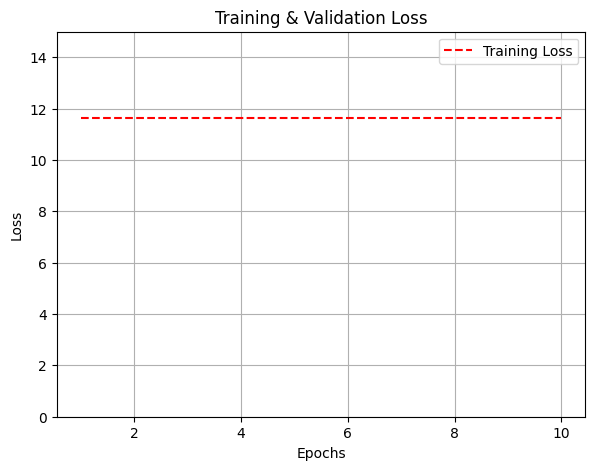

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, NUM_EPOCHS +1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
# plt.plot(epochs, loss_t, 'b-')
plt.plot(epochs, loss_e, 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0,15])
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.show()

In [ ]:
import torch

# GPU 사용 가능 여부 확인
if torch.cuda.is_available():
    # GPU를 디바이스로 설정
    device = torch.device("cuda")
else:
    # CPU를 디바이스로 설정
    device = torch.device("cpu")

In [ ]:
# article = data_str

prefix = "summarization-num_lines-{}: "
# model.to(device)
# input_text = prefix.format(1) + article
# input_ids = tokenizer(input_text, return_tensors="pt").input_ids.to(device)
max_length=512
# if len(input_ids) > max_length:
#     input_ids = input_ids[:max_length]


# gen_seq = model.generate(
#     input_ids,
#     num_beams=4,
#     max_length=512,
#     min_length=50
# )
# print(tokenizer.decode(gen_seq[0], skip_special_tokens=True))

# input_text = prefix.format(4) + article
# input_ids = tokenizer(input_text, return_tensors="pt").input_ids.to(device)
# gen_seq = model.generate(
#     input_ids,
#     num_beams=4,
#     max_length=512,
#     min_length=50
# )
# print(tokenizer.decode(gen_seq[0], skip_special_tokens=True))

text = data_str
# text = text.replace('\n', ' ')
model.to(device)
input_text = prefix.format(1) + text
raw_input_ids = tokenizer.encode(input_text)
input_ids = [tokenizer.bos_token_id] + raw_input_ids + [tokenizer.eos_token_id]
max_length = 512  

if len(input_ids) > max_length:
    input_ids = input_ids[:max_length]|

summary_ids = model.generate(torch.tensor([input_ids]).to(device), repetition_penalty=2.0, num_beams=4, 
                                min_length = 50, max_length=512,  eos_token_id=1,early_stopping= True)
summary_news_1 = tokenizer.decode(summary_ids.squeeze().tolist(), skip_special_tokens=True)


SyntaxError: ignored

In [ ]:
summary_news_1

In [ ]:
# article = data_str

prefix = "summarization-num_lines-{}: "
# model.to(device)
# input_text = prefix.format(1) + article
# input_ids = tokenizer(input_text, return_tensors="pt").input_ids.to(device)
max_length=512
# if len(input_ids) > max_length:
#     input_ids = input_ids[:max_length]


# gen_seq = model.generate(
#     input_ids,
#     num_beams=4,
#     max_length=512,
#     min_length=50
# )
# print(tokenizer.decode(gen_seq[0], skip_special_tokens=True))

# input_text = prefix.format(4) + article
# input_ids = tokenizer(input_text, return_tensors="pt").input_ids.to(device)
# gen_seq = model.generate(
#     input_ids,
#     num_beams=4,
#     max_length=512,
#     min_length=50
# )
# print(tokenizer.decode(gen_seq[0], skip_special_tokens=True))

text = data_str
# text = text.replace('\n', ' ')
model.to(device)
input_text = prefix.format(4) + text
raw_input_ids = tokenizer.encode(input_text)
input_ids = [tokenizer.bos_token_id] + raw_input_ids + [tokenizer.eos_token_id]
max_length = 512  

if len(input_ids) > max_length:
  input_ids = input_ids[:max_length]


summary_ids = model.generate(torch.tensor([input_ids]).to(device), repetition_penalty=2.0, num_beams=4, 
                                min_length = 50, max_length=512,  eos_token_id=1,early_stopping= True)
summary_news_4 = tokenizer.decode(summary_ids.squeeze().tolist(), skip_special_tokens=True)


In [ ]:
summary_news_4

In [ ]:
!pip install rouge

In [ ]:
from rouge import Rouge
Rouge_list = []
# for i in range(0, len(model_out)):
reference = [reference_str]
rouge = Rouge()
rouge.get_scores([summary_news_1], reference , avg = True)

In [ ]:
from rouge import Rouge
Rouge_list = []
# for i in range(0, len(model_out)):
reference = [reference_str]
rouge = Rouge()
rouge.get_scores([summary_news_4], reference , avg = True)

In [ ]:
!pip install konlpy

In [ ]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

In [ ]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

In [ ]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

In [ ]:
from konlpy.tag import Mecab
#from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import corpus_bleu

from konlpy.tag import Mecab
from nltk.translate.bleu_score import corpus_bleu

mecab = Mecab()

# for i in range(0, len(model_out)):
reference = [reference_str]
reference = [[mecab.morphs(s) for s in reference]]
candidate = [mecab.morphs(summary_news_1)]

print(f'reference: {reference}')
print('candidate:', candidate)
print('BLEU:', corpus_bleu(reference, candidate))


score1 = corpus_bleu(reference, candidate, weights=(1, 0, 0, 0))
score2 = corpus_bleu(reference, candidate, weights=(0, 1, 0, 0))
score3 = corpus_bleu(reference, candidate, weights=(0, 0, 1, 0))
score4 = corpus_bleu(reference, candidate, weights=(0, 0, 0, 1))

print("Individual 1-gram : ", score1)  
print("Individual 2-gram : ", score2)  
print("Individual 3-gram : ", score3)  
print("Individual 4-gram : ", score4)  

#기본적으로 sentence_bleu() 함수는 BLEU-4라고도 하는 누적 4그램 BLEU 점수를 계산합니다. 
#BLEU-4의 가중치는 다음과 같습니다.
#이것이 n-gram 가중치를 추가하지 않고 얻은 정확한 점수입니다.

score = corpus_bleu(reference, candidate, weights=(0.25, 0.25, 0.25, 0.25))
print("BLEU-4 : ", score)  

In [ ]:
from konlpy.tag import Mecab
#from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import corpus_bleu

from konlpy.tag import Mecab
from nltk.translate.bleu_score import corpus_bleu

mecab = Mecab()

# for i in range(0, len(model_out)):
reference = [reference_str]
reference = [[mecab.morphs(s) for s in reference]]
candidate = [mecab.morphs(summary_news_4)]

print(f'reference: {reference}')
print('candidate:', candidate)
print('BLEU:', corpus_bleu(reference, candidate))


score1 = corpus_bleu(reference, candidate, weights=(1, 0, 0, 0))
score2 = corpus_bleu(reference, candidate, weights=(0, 1, 0, 0))
score3 = corpus_bleu(reference, candidate, weights=(0, 0, 1, 0))
score4 = corpus_bleu(reference, candidate, weights=(0, 0, 0, 1))

print("Individual 1-gram : ", score1)  
print("Individual 2-gram : ", score2)  
print("Individual 3-gram : ", score3)  
print("Individual 4-gram : ", score4)  

#기본적으로 sentence_bleu() 함수는 BLEU-4라고도 하는 누적 4그램 BLEU 점수를 계산합니다. 
#BLEU-4의 가중치는 다음과 같습니다.
#이것이 n-gram 가중치를 추가하지 않고 얻은 정확한 점수입니다.

score = corpus_bleu(reference, candidate, weights=(0.25, 0.25, 0.25, 0.25))
print("BLEU-4 : ", score)  